# Time Series Forecasting

In [1]:
# pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## EDA and Preprocessing

In [3]:
# Load the data
data=pd.read_csv('New motor vehicle sales data.csv', parse_dates = True)

# Display the shape of the data
data.shape

(160918, 18)

In [4]:
# Display the first few rows of the data
data.head()

,REF_DATE,GEO,DGUID,Vehicle type,Origin of manufacture,Sales,Seasonal adjustment,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-10,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,11462.0,NaN,NaN,NaN,0
1,1946-11,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13497.0,NaN,NaN,NaN,0
2,1946-12,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,12689.0,NaN,NaN,NaN,0
3,1947-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13977.0,NaN,NaN,NaN,0
4,1947-02,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,15806.0,NaN,NaN,NaN,0


### Checked missing value

since no missing value in the main columns we need "REF_DATE" and "Value", no need to drop any missing value.

Comment from Kelechi: The Value column has some null data for some provinces! We will explore if necessary to fill the nulls.

In [5]:
# check for missing values
data.isnull().sum()

REF_DATE                      0
GEO                           0
DGUID                     14362
Vehicle type                  0
Origin of manufacture         0
Sales                         0
Seasonal adjustment           0
UOM                           0
UOM_ID                        0
SCALAR_FACTOR                 0
SCALAR_ID                     0
VECTOR                        0
COORDINATE                    0
VALUE                     18441
STATUS                   142477
SYMBOL                   160918
TERMINATED               155134
DECIMALS                      0
dtype: int64

### Check duplicates

In [6]:
# Check for duplicates
data.duplicated().sum()

0

### Make Year and Month

In [7]:
data['REF_DATE'] = pd.to_datetime(data['REF_DATE'])
# data['REF_DATE'] = data['REF_DATE'].dt.strftime('%Y-%m')
data.head()

,REF_DATE,GEO,DGUID,Vehicle type,Origin of manufacture,Sales,Seasonal adjustment,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-10-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,11462.0,NaN,NaN,NaN,0
1,1946-11-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13497.0,NaN,NaN,NaN,0
2,1946-12-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,12689.0,NaN,NaN,NaN,0
3,1947-01-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13977.0,NaN,NaN,NaN,0
4,1947-02-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,15806.0,NaN,NaN,NaN,0


### Deal with aggregated data

We found that in the dataset, there is aggregated 
1. GEO: national data and provincial data.
2. Vehicle type: Passenger, Truck, and Total New
3. Origin of manufacture: "Japen", "North America", "Other Countries", "Total, country of manufacture", "Total, overseas"


In [8]:
# Display the unique value within each columns
data.nunique()

REF_DATE                   929
GEO                         11
DGUID                       10
Vehicle type                 3
Origin of manufacture        5
Sales                        2
Seasonal adjustment          2
UOM                          2
UOM_ID                       2
SCALAR_FACTOR                2
SCALAR_ID                    2
VECTOR                     257
COORDINATE                 257
VALUE                    63879
STATUS                       1
SYMBOL                       0
TERMINATED                   1
DECIMALS                     1
dtype: int64

#### Deal with aggregated GEO

In [9]:
# Display the  unique values in the 'GEO' column
data['GEO'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia and the Territories'],
      dtype=object)

In [10]:
# Split the data with 'GEO="Canada"'
data_canada=data[data['GEO']=='Canada']

# Display the shape of the data
data_canada.head()

,REF_DATE,GEO,DGUID,Vehicle type,Origin of manufacture,Sales,Seasonal adjustment,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-10-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,11462.0,NaN,NaN,NaN,0
1,1946-11-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13497.0,NaN,NaN,NaN,0
2,1946-12-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,12689.0,NaN,NaN,NaN,0
3,1947-01-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13977.0,NaN,NaN,NaN,0
4,1947-02-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,15806.0,NaN,NaN,NaN,0


In [11]:
# filter data_canada store Sales = Units, Seasonal adjustment	= Unadjusted, Vehicle type	="Total, new motor vehicles", Origin of manufacture = "Total, new motor vehicles"
data_canada=data_canada[(data_canada['Sales']=='Units') & (data_canada['Seasonal adjustment']=='Unadjusted') & (data_canada['Vehicle type']=='Total, new motor vehicles') & (data_canada['Origin of manufacture']=='Total, country of manufacture')]

In [12]:
# Display the shape of the data
data_canada.shape

(929, 18)

In [13]:
#Split for provincial data 'GEO' not equal to "Canada"
data_provincial=data[data['GEO']!='Canada']

#Display the unique values in the 'GEO' column to confirm that the rows with 'GEO="Canada" have been removed
data_provincial['GEO'].unique()

#Display the shape of the data
data_provincial.shape

(141268, 18)

In [14]:
# Display the first few rows of the data
data_provincial.head()

,REF_DATE,GEO,DGUID,Vehicle type,Origin of manufacture,Sales,Seasonal adjustment,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
19650,1968-01-01,Newfoundland and Labrador,2016A000210,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169996,2.1.1.1.1,754.0,NaN,NaN,NaN,0
19651,1968-02-01,Newfoundland and Labrador,2016A000210,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169996,2.1.1.1.1,895.0,NaN,NaN,NaN,0
19652,1968-03-01,Newfoundland and Labrador,2016A000210,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169996,2.1.1.1.1,1569.0,NaN,NaN,NaN,0
19653,1968-04-01,Newfoundland and Labrador,2016A000210,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169996,2.1.1.1.1,1390.0,NaN,NaN,NaN,0
19654,1968-05-01,Newfoundland and Labrador,2016A000210,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169996,2.1.1.1.1,1567.0,NaN,NaN,NaN,0


In [15]:
# filter data_provincial store Sales = Units, Seasonal adjustment	= Unadjusted, Vehicle type	=Total, new motor vehicles
data_provincial=data_provincial[(data_provincial['Sales']=='Units') & (data_provincial['Seasonal adjustment']=='Unadjusted') & (data_provincial['Vehicle type']=='Total, new motor vehicles') & (data_provincial['Origin of manufacture']=='Total, country of manufacture')]

In [16]:
#Display the shape of the data
data_provincial.shape

(6740, 18)

### Plot

#### National Level

In [17]:
# sort the data by 'REF_DATE' in ascending order
data_canada.head()

,REF_DATE,GEO,DGUID,Vehicle type,Origin of manufacture,Sales,Seasonal adjustment,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-10-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,11462.0,NaN,NaN,NaN,0
1,1946-11-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13497.0,NaN,NaN,NaN,0
2,1946-12-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,12689.0,NaN,NaN,NaN,0
3,1947-01-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13977.0,NaN,NaN,NaN,0
4,1947-02-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,15806.0,NaN,NaN,NaN,0


In [18]:
# List categories in categorical columns
categorical_columns = ['GEO', 'Vehicle type', 'Origin of manufacture', 'Sales', 'Seasonal adjustment', 'UOM', 'SCALAR_FACTOR']
categories = {col: data_canada[col].unique() for col in categorical_columns}

# Display the categories
for col, unique_values in categories.items():
    print(f"{col}: {unique_values}")

GEO: ['Canada']
Vehicle type: ['Total, new motor vehicles']
Origin of manufacture: ['Total, country of manufacture']
Sales: ['Units']
Seasonal adjustment: ['Unadjusted']
UOM: ['Units']
SCALAR_FACTOR: ['units']


## Forecasting

In [19]:
# 将 REF_DATE 转换为日期格式
data_canada['REF_DATE'] = pd.to_datetime(data_canada['REF_DATE'], format='%Y-%m')
# 按日期排序
data_canada = data_canada.sort_values('REF_DATE')
# 提取日期和销售量作为时间序列数据
ts_data_canada = data_canada[['REF_DATE', 'VALUE']].set_index('REF_DATE')

In [20]:
# 检查缺失值
print(ts_data_canada.isnull().sum())
# 如果有缺失值，可以用插值法填充
# ts_data_canada['VALUE'] = ts_data_canada['VALUE'].interpolate(method='linear')

VALUE    0
dtype: int64


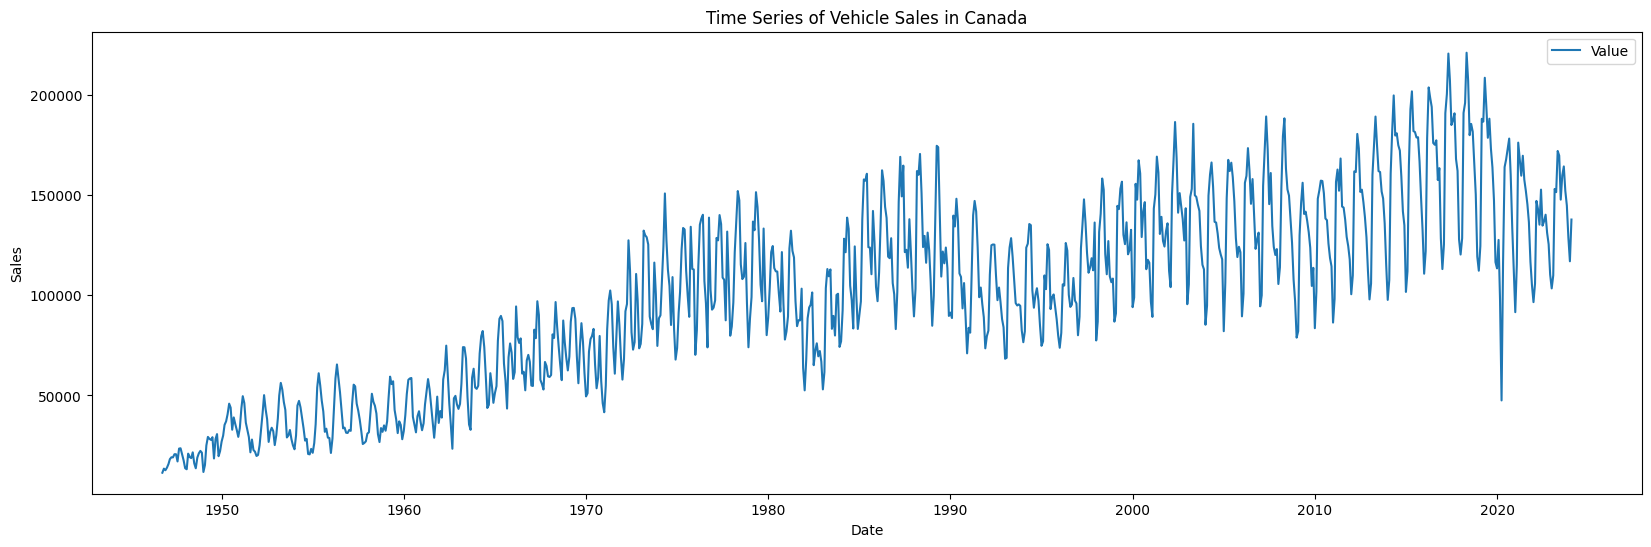

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(ts_data_canada.index, ts_data_canada['VALUE'], label='Value')
plt.title('Time Series of Vehicle Sales in Canada')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

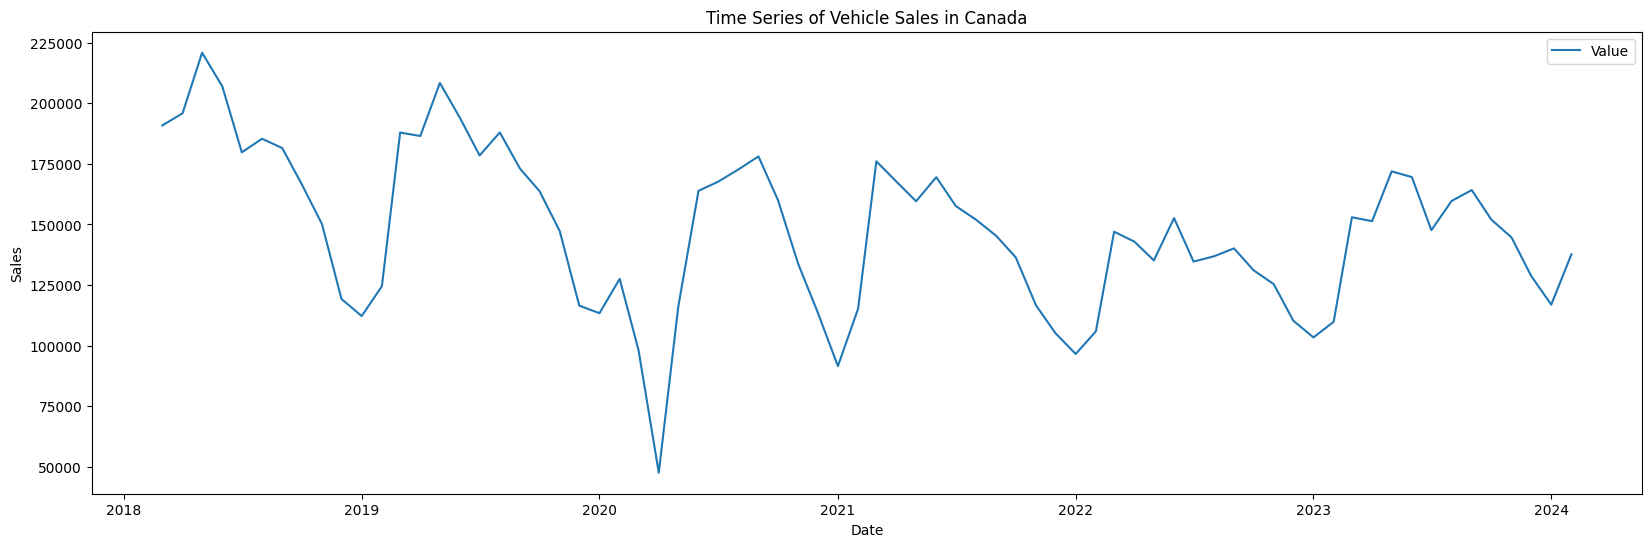

In [22]:
ts_data_last_72_mths = ts_data_canada.tail(72)

plt.figure(figsize=(20, 6))
plt.plot(ts_data_last_72_mths.index, ts_data_last_72_mths['VALUE'], label='Value')
plt.title('Time Series of Vehicle Sales in Canada')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [23]:
ts_data_last_72_mths.head()

,VALUE
REF_DATE,
2018-03-01,190863.0
2018-04-01,195838.0
2018-05-01,220858.0
2018-06-01,206988.0
2018-07-01,179754.0


### Split Train and Test sets

In [24]:
# Define the split: past 36 months as the test set
test_period = 36  # Number of months for the test set
test_set = ts_data_last_72_mths.tail(test_period)
train_set = ts_data_last_72_mths.iloc[:-test_period]

### Method: ARIMA

c:\Kelly\timeSeriesPython310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Kelly\timeSeriesPython310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Kelly\timeSeriesPython310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Kelly\timeSeriesPython310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


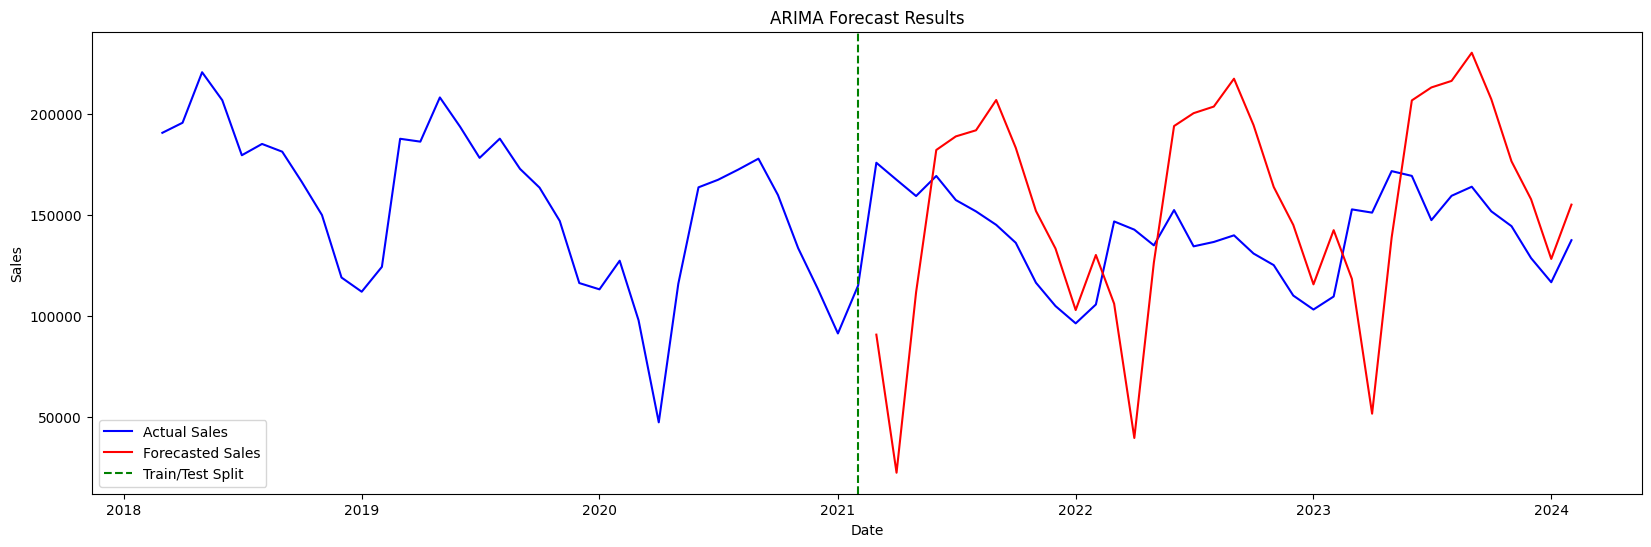

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model on the training set
model = ARIMA(train_set['VALUE'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
arima_result = model.fit()

# Forecast the next 36 months (test set period)
forecast_arima = arima_result.forecast(steps=test_period)

# Create a DataFrame for the forecasted values
forecast_dates = pd.date_range(start=train_set.index[-1] + pd.DateOffset(months=1), 
                               periods=test_period, freq='MS')
forecast_df = pd.DataFrame({'Forecast': forecast_arima}, index=forecast_dates)

# Plot the actual vs forecasted values
plt.figure(figsize=(20, 6))
plt.plot(ts_data_last_72_mths.index, ts_data_last_72_mths['VALUE'], label='Actual Sales', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Sales', color='red')
plt.axvline(x=train_set.index[-1], color='green', linestyle='--', label='Train/Test Split')
plt.title('ARIMA Forecast Results')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 47014.54889723227
Root Mean Squared Error (RMSE): 55270.310490889206
Mean Absolute Percentage Error (MAPE): 32.70%


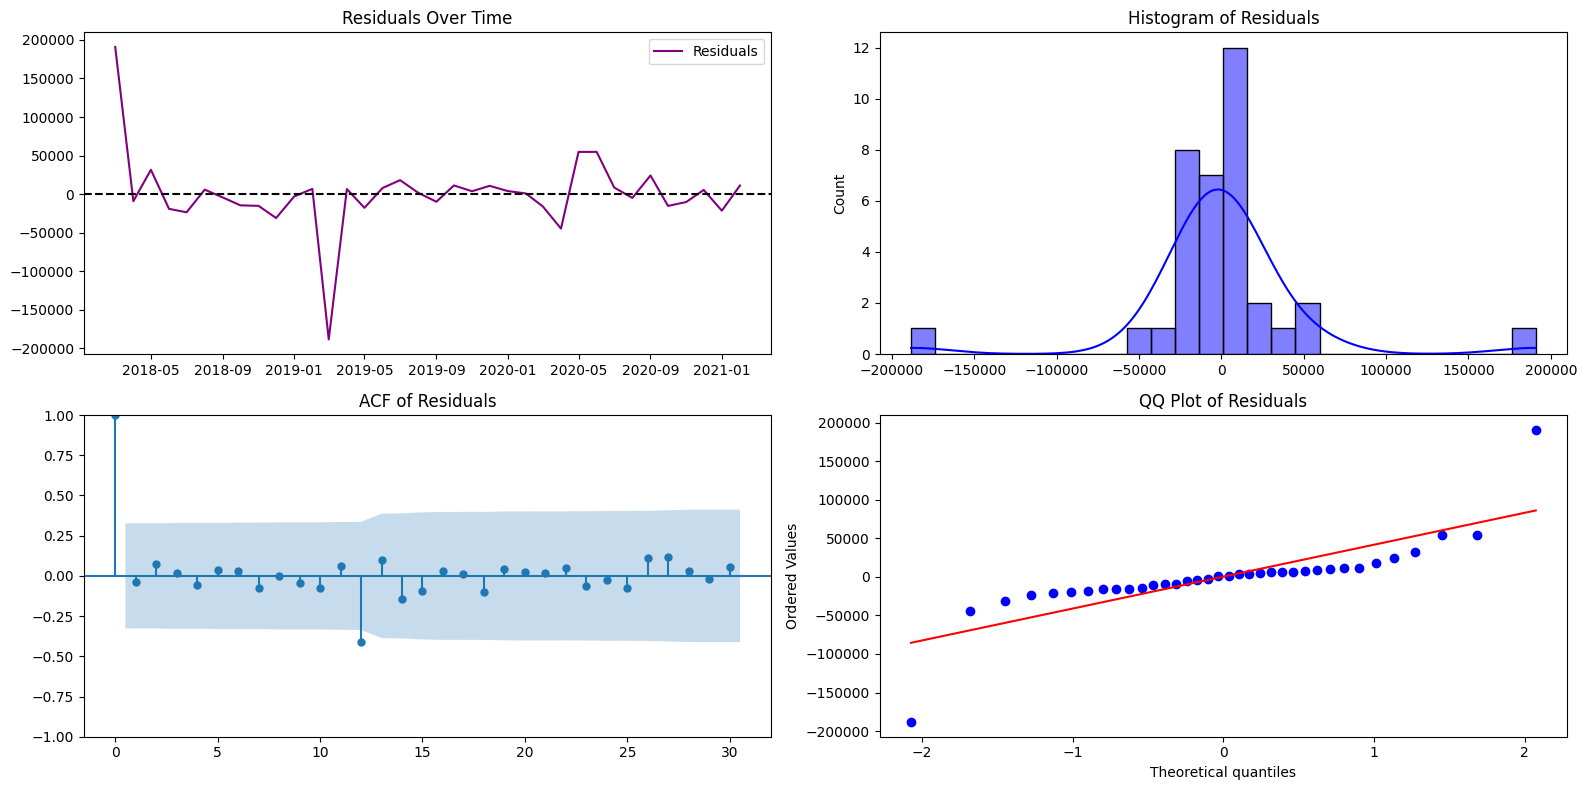


Ljung-Box Test for Residuals:
     lb_stat  lb_pvalue
10  1.189641   0.999621


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate the forecast using test set
test_set_values = test_set['VALUE']  # Ensure test_set contains the actual test period values
mae = mean_absolute_error(test_set_values, forecast_arima)
rmse = np.sqrt(mean_squared_error(test_set_values, forecast_arima))
mape = np.mean(np.abs((test_set_values - forecast_arima) / test_set_values)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Residual Analysis
residuals = arima_result.resid

# Plot residuals
plt.figure(figsize=(16, 8))

# Residuals over time
plt.subplot(2, 2, 1)
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals Over Time')
plt.legend()

# Histogram of residuals
plt.subplot(2, 2, 2)
sns.histplot(residuals, kde=True, color='blue')
plt.title('Histogram of Residuals')

# ACF plot of residuals
from statsmodels.graphics.tsaplots import plot_acf
plt.subplot(2, 2, 3)
plot_acf(residuals, lags=30, ax=plt.gca())
plt.title('ACF of Residuals')

# QQ plot of residuals
import scipy.stats as stats
plt.subplot(2, 2, 4)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')

plt.tight_layout()
plt.show()

# Check if residuals are white noise
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\nLjung-Box Test for Residuals:")
print(ljung_box_test)

### Method: NeuralProphet

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Kelly\timeSeriesPython310\lib\site-packages\neuralprophet\df_utils.py:464: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  if df.groupby("ID").apply(lambda x: x.duplicated("ds").any()).any():

WARNING - (py.warnings._showwarnmsg) - c:\Kelly\timeSeriesPython310\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_fr

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Kelly\timeSeriesPython310\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.222]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Kelly\timeSeriesPython310\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Kelly\timeSeriesPython310\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtyp

Predicting: 5it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


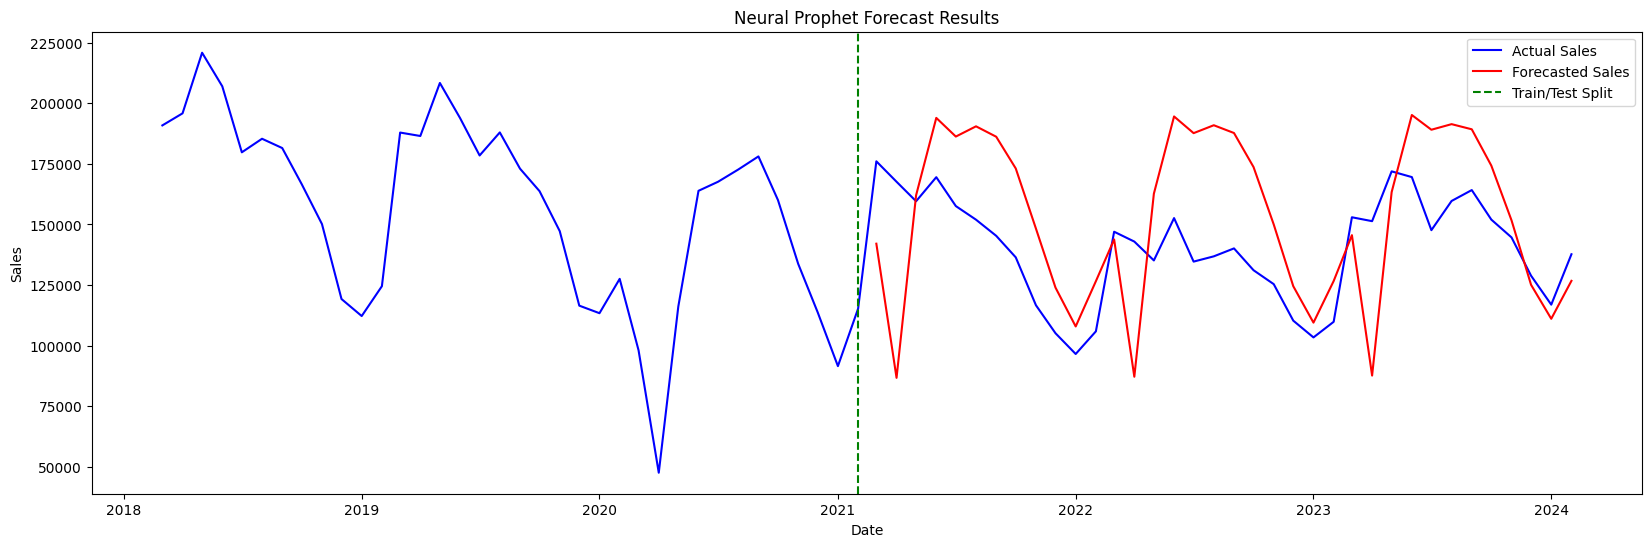

In [27]:
from neuralprophet import NeuralProphet

# Prepare data for Neural Prophet (requires 'ds' and 'y' columns)
# Assuming your data has a datetime index and 'VALUE' column
train_prophet = train_set.reset_index()
train_prophet.columns = ['ds', 'y']  # Neural Prophet requires 'ds' (date) and 'y' (target) columns

test_prophet = test_set.reset_index()
test_prophet.columns = ['ds', 'y']

# Initialize and fit the Neural Prophet model
model_np = NeuralProphet(
    growth='linear',
    changepoints_range=0.8,
    n_changepoints=10,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='additive',
    epochs=100,
    learning_rate=0.01
)

# Fit the model on training data
np_result = model_np.fit(train_prophet, freq='MS')

# Create future dataframe for forecasting
future_dates = model_np.make_future_dataframe(train_prophet, periods=test_period, n_historic_predictions=len(train_prophet))

# Make predictions
forecast_np = model_np.predict(future_dates)

# Extract forecasted values for the test period
forecast_neural_prophet = forecast_np.tail(test_period)['yhat1'].values

# Create a DataFrame for the forecasted values
forecast_dates = pd.date_range(start=train_set.index[-1] + pd.DateOffset(months=1), 
                               periods=test_period, freq='MS')
forecast_df = pd.DataFrame({'Forecast': forecast_neural_prophet}, index=forecast_dates)

# Plot the actual vs forecasted values
plt.figure(figsize=(20, 6))
plt.plot(ts_data_last_72_mths.index, ts_data_last_72_mths['VALUE'], label='Actual Sales', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Sales', color='red')
plt.axvline(x=train_set.index[-1], color='green', linestyle='--', label='Train/Test Split')
plt.title('Neural Prophet Forecast Results')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 28060.756944444445
Root Mean Squared Error (RMSE): 33769.593813795334
Mean Absolute Percentage Error (MAPE): 19.79%


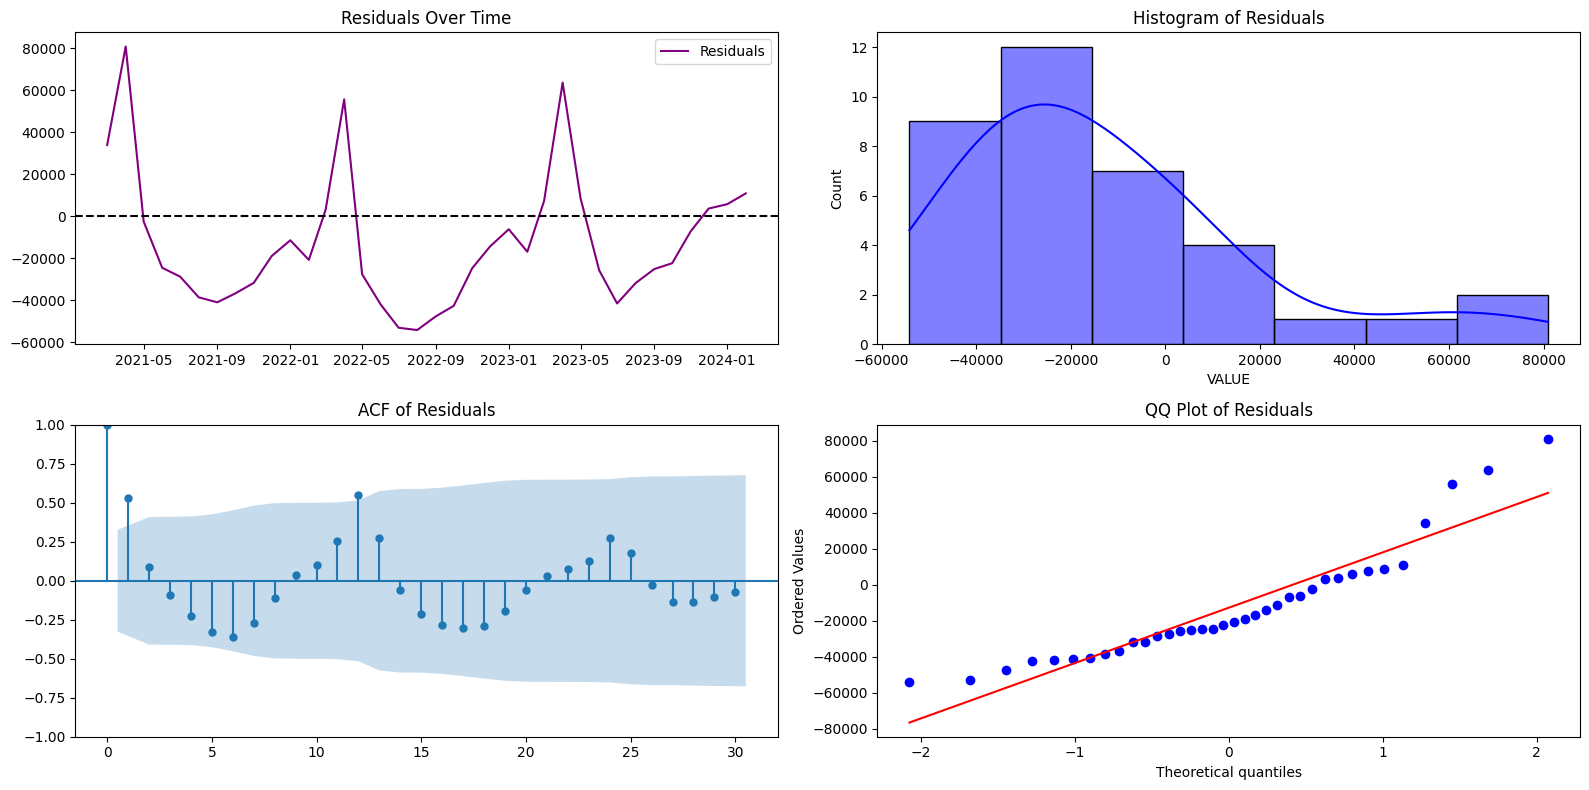


Ljung-Box Test for Residuals:
      lb_stat  lb_pvalue
10  29.184636   0.001163


WARNING - (py.warnings._showwarnmsg) - c:\Kelly\timeSeriesPython310\lib\site-packages\neuralprophet\plot_forecast_plotly.py:398: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - c:\Kelly\timeSeriesPython310\lib\site-packages\neuralprophet\plot_forecast_plotly.py:398: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - c:\Kelly\timeSeriesPython310\lib\site-packages\neuralprophet\df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas t

In [28]:
# Evaluate the forecast using test set
test_set_values = test_set['VALUE']
mae = mean_absolute_error(test_set_values, forecast_neural_prophet)
rmse = np.sqrt(mean_squared_error(test_set_values, forecast_neural_prophet))
mape = np.mean(np.abs((test_set_values - forecast_neural_prophet) / test_set_values)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Residual Analysis
residuals = test_set_values - forecast_neural_prophet

# Plot residuals
plt.figure(figsize=(16, 8))

# Residuals over time
plt.subplot(2, 2, 1)
plt.plot(forecast_df.index, residuals, label='Residuals', color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals Over Time')
plt.legend()

# Histogram of residuals
plt.subplot(2, 2, 2)
sns.histplot(residuals, kde=True, color='blue')
plt.title('Histogram of Residuals')

# ACF plot of residuals
from statsmodels.graphics.tsaplots import plot_acf
plt.subplot(2, 2, 3)
plot_acf(residuals, lags=min(30, len(residuals)-1), ax=plt.gca())
plt.title('ACF of Residuals')

# QQ plot of residuals
import scipy.stats as stats
plt.subplot(2, 2, 4)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')

plt.tight_layout()
plt.show()

# Check if residuals are white noise
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(residuals, lags=[min(10, len(residuals)-1)], return_df=True)
print("\nLjung-Box Test for Residuals:")
print(ljung_box_test)

# Optional: Plot Neural Prophet components
fig_components = model_np.plot_components(forecast_np)
plt.show()

# Optional: Plot model parameters
fig_params = model_np.plot_parameters()
plt.show()


### Method Prophet

16:44:53 - cmdstanpy - INFO - Chain [1] start processing
16:44:53 - cmdstanpy - INFO - Chain [1] done processing


Fitting Prophet model...
Making predictions...


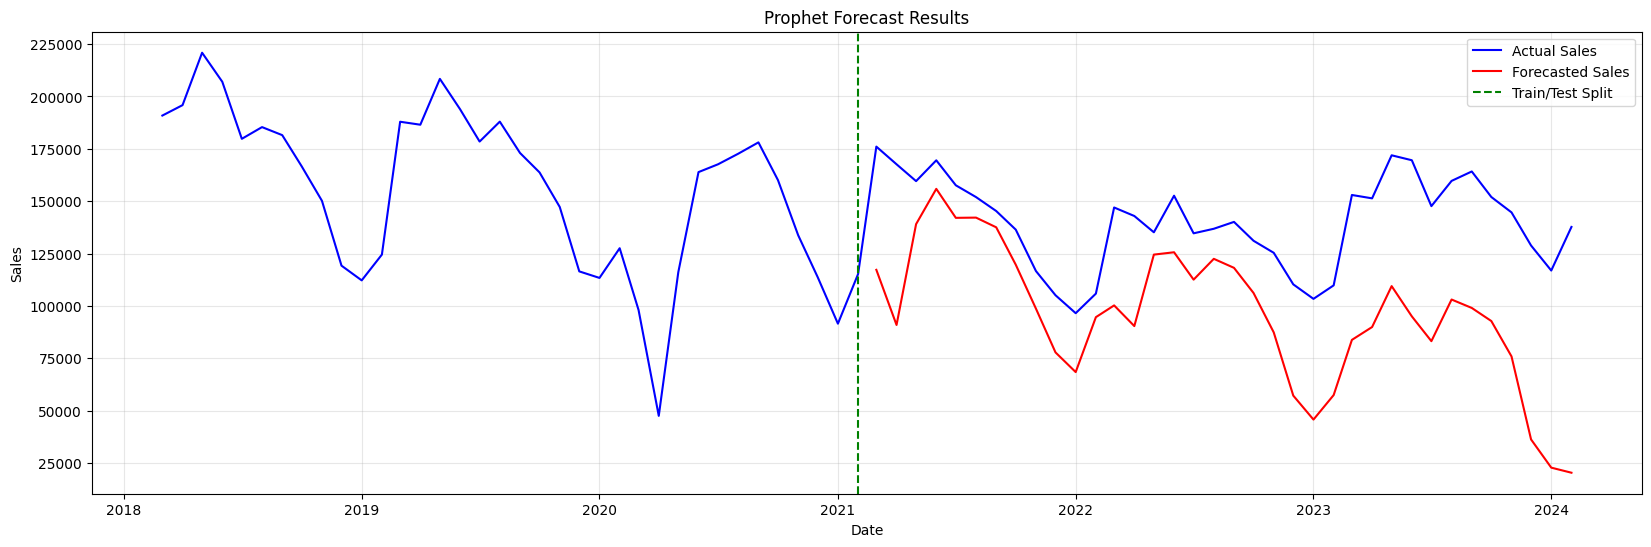

In [30]:
from prophet import Prophet

# Prepare data for Prophet (requires 'ds' and 'y' columns)
train_prophet = train_set.reset_index()
train_prophet.columns = ['ds', 'y']

test_prophet = test_set.reset_index()
test_prophet.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model_prophet = Prophet(
    growth='linear',
    changepoint_range=0.8,
    n_changepoints=10,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='additive',
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10.0,
    interval_width=0.8
)

# Suppress Prophet's informational messages
import logging
logging.getLogger('prophet').setLevel(logging.WARNING)

# Fit the model on training data
print("Fitting Prophet model...")
model_prophet.fit(train_prophet)

# Create future dataframe for forecasting
future_dates = model_prophet.make_future_dataframe(periods=test_period, freq='MS')

# Make predictions
print("Making predictions...")
forecast_prophet = model_prophet.predict(future_dates)

# Extract forecasted values for the test period
forecast_values = forecast_prophet.tail(test_period)['yhat'].values

# Create a DataFrame for the forecasted values
forecast_dates = pd.date_range(start=train_set.index[-1] + pd.DateOffset(months=1), 
                               periods=test_period, freq='MS')
forecast_df = pd.DataFrame({'Forecast': forecast_values}, index=forecast_dates)

# Plot the actual vs forecasted values
plt.figure(figsize=(20, 6))
plt.plot(ts_data_last_72_mths.index, ts_data_last_72_mths['VALUE'], label='Actual Sales', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Sales', color='red')
plt.axvline(x=train_set.index[-1], color='green', linestyle='--', label='Train/Test Split')
plt.title('Prophet Forecast Results')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Prophet Model Performance:
Mean Absolute Error (MAE): 44760.03
Root Mean Squared Error (RMSE): 52593.58
Mean Absolute Percentage Error (MAPE): 32.27%


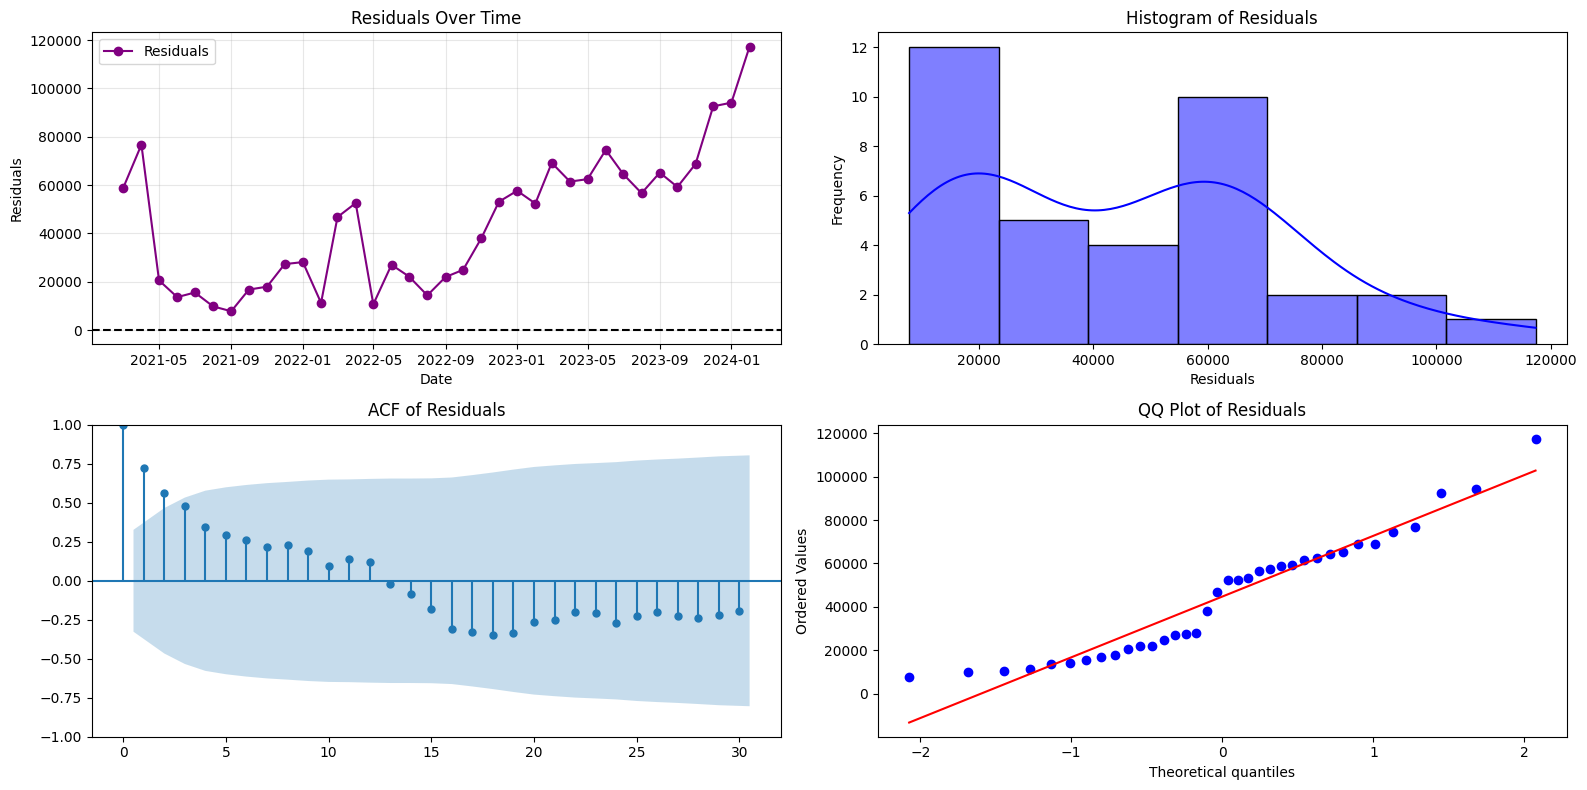


Ljung-Box Test for Residuals:
      lb_stat     lb_pvalue
10  61.481794  1.898253e-09
Residuals may not be white noise (consider model improvements)

Plotting Prophet components...


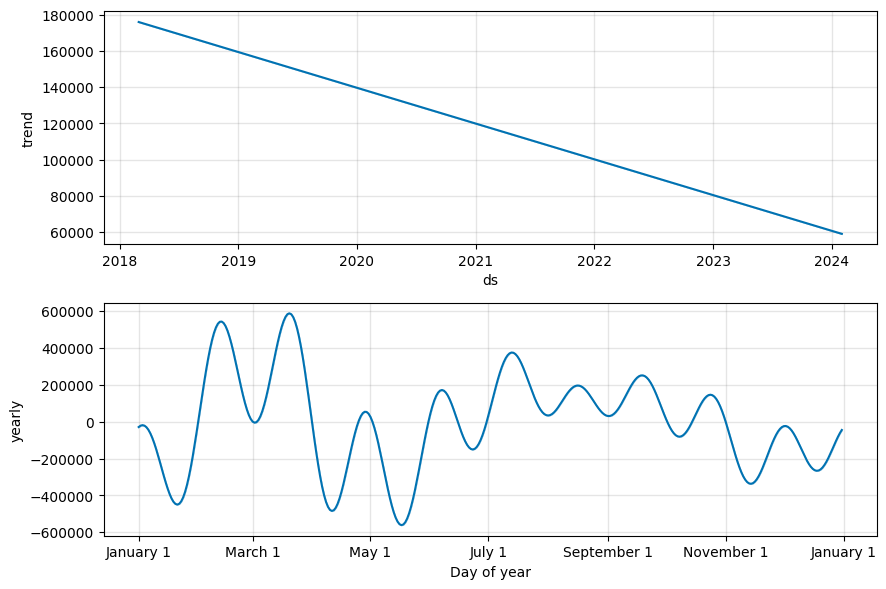

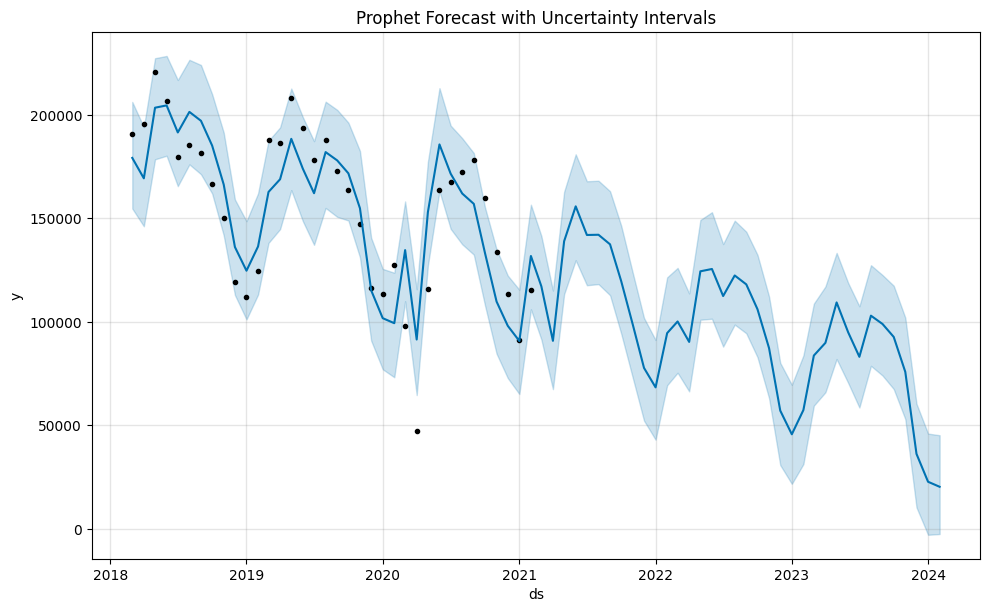


Forecast Summary:
Last actual value: 137686.00
Last forecasted value: 20351.08
Forecast trend: Decreasing


In [31]:
# Evaluate the forecast using test set
test_set_values = test_set['VALUE'].values
mae = mean_absolute_error(test_set_values, forecast_values)
rmse = np.sqrt(mean_squared_error(test_set_values, forecast_values))
mape = np.mean(np.abs((test_set_values - forecast_values) / test_set_values)) * 100

print(f"\nProphet Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Residual Analysis
residuals = test_set_values - forecast_values

# Plot residuals
plt.figure(figsize=(16, 8))

# Residuals over time
plt.subplot(2, 2, 1)
plt.plot(forecast_df.index, residuals, label='Residuals', color='purple', marker='o')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True, alpha=0.3)

# Histogram of residuals
plt.subplot(2, 2, 2)
sns.histplot(residuals, kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# ACF plot of residuals
from statsmodels.graphics.tsaplots import plot_acf
plt.subplot(2, 2, 3)
plot_acf(residuals, lags=min(30, len(residuals)-1), ax=plt.gca())
plt.title('ACF of Residuals')

# QQ plot of residuals
import scipy.stats as stats
plt.subplot(2, 2, 4)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')

plt.tight_layout()
plt.show()

# Check if residuals are white noise
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(residuals, lags=[min(10, len(residuals)-1)], return_df=True)
print("\nLjung-Box Test for Residuals:")
print(ljung_box_test)

if ljung_box_test['lb_pvalue'].iloc[0] > 0.05:
    print("Residuals appear to be white noise (good!)")
else:
    print("Residuals may not be white noise (consider model improvements)")

# Plot Prophet components
print("\nPlotting Prophet components...")
fig_components = model_prophet.plot_components(forecast_prophet)
plt.show()

# Additional Prophet plot
fig_forecast = model_prophet.plot(forecast_prophet)
plt.title('Prophet Forecast with Uncertainty Intervals')
plt.show()

# Print forecast summary
print(f"\nForecast Summary:")
print(f"Last actual value: {test_set_values[-1]:.2f}")
print(f"Last forecasted value: {forecast_values[-1]:.2f}")
print(f"Forecast trend: {'Increasing' if forecast_values[-1] > forecast_values[0] else 'Decreasing'}")

### Method: LSTM

WARNING - (py.warnings._showwarnmsg) - c:\Kelly\timeSeriesPython310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Preparing data for LSTM...
Training sequences shape: (24, 12)
Training targets shape: (24,)
Building LSTM model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 12, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,101 (203.52 KB)

 Trainable params: 52,101 (203.52 KB)

 Non-trainable params: 0 (0.00 B)

Training LSTM model...
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.4940 - mae: 0.6658 - val_loss: 0.1930 - val_mae: 0.4192 - learning_rate: 0.0010
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - loss: 0.4116 - mae: 0.6017 - val_loss: 0.1527 - val_mae: 0.3678 - learning_rate: 0.0010
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - loss: 0.3411 - mae: 0.5458 - val_loss: 0.1168 - val_mae: 0.3149 - learning_rate: 0.0010
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - loss: 0.2778 - mae: 0.4887 - val_loss: 0.0842 - val_mae: 0.2577 - learning_rate: 0.0010
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - loss: 0.2172 - mae: 0.4274 - val_loss: 0.0554 - val_mae: 0.1936 - learning_rate: 0.0010
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - loss: 0.1685 - mae: 0.3742 - val_loss: 0.0324 - val_mae: 0.1453 - learning_rate: 0.0010
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - loss: 0.1084 - mae: 0.2866 - val_loss: 0.0194 - val_mae: 0.1081 - learning_rate: 

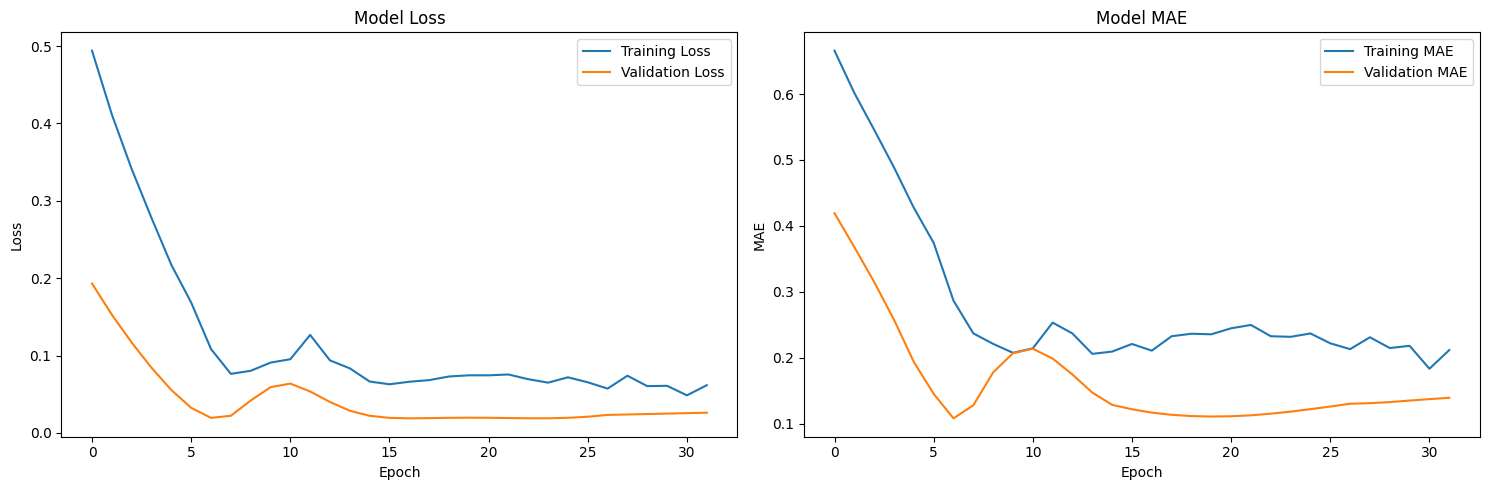

Making predictions...


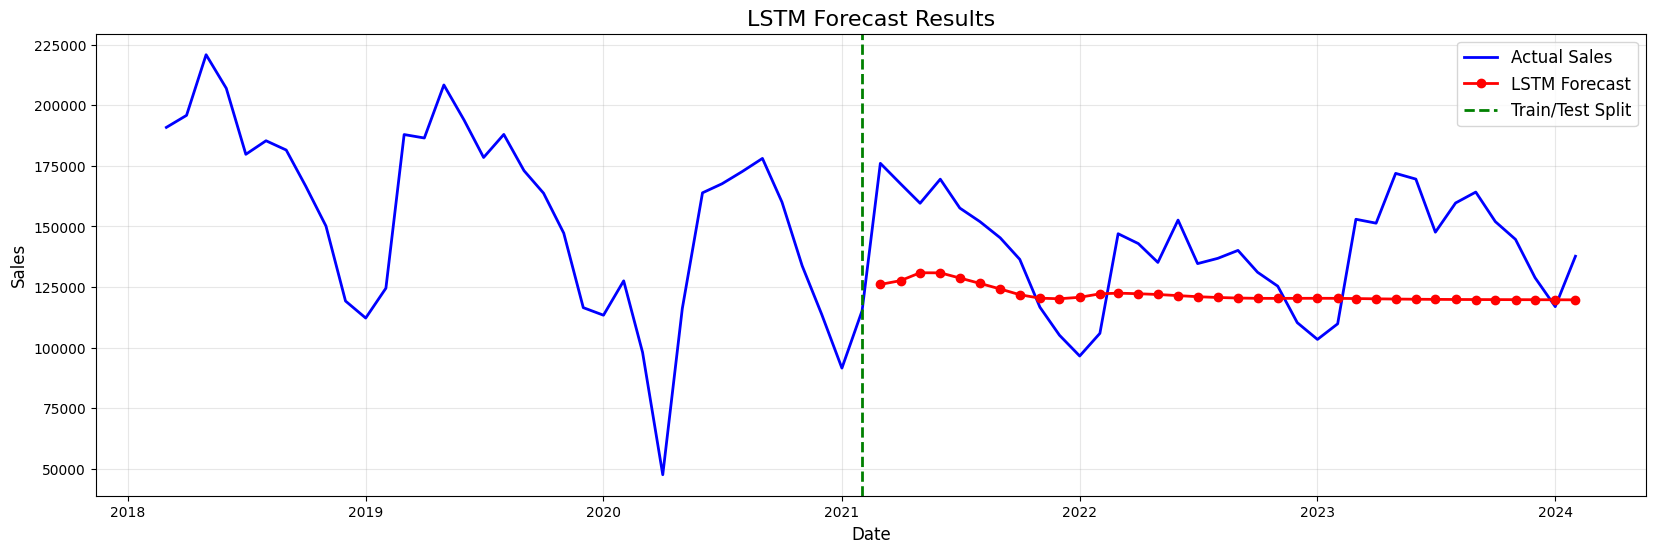

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# LSTM Configuration
LOOKBACK_WINDOW = 12  # Number of previous months to look at
LSTM_UNITS = 50
EPOCHS = 100
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

def create_sequences(data, lookback_window):
    """Create sequences for LSTM training"""
    X, y = [], []
    for i in range(lookback_window, len(data)):
        X.append(data[i-lookback_window:i])
        y.append(data[i])
    return np.array(X), np.array(y)

def build_lstm_model(input_shape):
    """Build and compile LSTM model"""
    model = Sequential([
        LSTM(LSTM_UNITS, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(LSTM_UNITS, return_sequences=True),
        Dropout(0.2),
        LSTM(LSTM_UNITS, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    return model

# Prepare data for LSTM
print("Preparing data for LSTM...")

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_set.values.reshape(-1, 1))
test_scaled = scaler.transform(test_set.values.reshape(-1, 1))

# Create sequences for training
X_train, y_train = create_sequences(train_scaled.flatten(), LOOKBACK_WINDOW)

print(f"Training sequences shape: {X_train.shape}")
print(f"Training targets shape: {y_train.shape}")

# Reshape for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Build the model
print("Building LSTM model...")
model = build_lstm_model((LOOKBACK_WINDOW, 1))
model.summary()

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    min_lr=0.0001
)

# Train the model
print("Training LSTM model...")
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions on test set
print("Making predictions...")

# We need the last LOOKBACK_WINDOW values from training data to start predictions
last_sequence = train_scaled[-LOOKBACK_WINDOW:].flatten()
predictions = []

# Predict step by step
for i in range(test_period):
    # Reshape for prediction
    current_sequence = last_sequence.reshape((1, LOOKBACK_WINDOW, 1))
    
    # Make prediction
    pred = model.predict(current_sequence, verbose=0)
    predictions.append(pred[0, 0])
    
    # Update sequence for next prediction
    last_sequence = np.append(last_sequence[1:], pred[0, 0])

# Convert predictions back to original scale
predictions = np.array(predictions).reshape(-1, 1)
predictions_rescaled = scaler.inverse_transform(predictions).flatten()

# Create forecast DataFrame
forecast_dates = pd.date_range(start=train_set.index[-1] + pd.DateOffset(months=1), 
                               periods=test_period, freq='MS')
forecast_df = pd.DataFrame({'Forecast': predictions_rescaled}, index=forecast_dates)

# Plot results
plt.figure(figsize=(20, 6))
plt.plot(ts_data_last_72_mths.index, ts_data_last_72_mths['VALUE'], 
         label='Actual Sales', color='blue', linewidth=2)
plt.plot(forecast_df.index, forecast_df['Forecast'], 
         label='LSTM Forecast', color='red', linewidth=2, marker='o')
plt.axvline(x=train_set.index[-1], color='green', linestyle='--', 
            label='Train/Test Split', linewidth=2)
plt.title('LSTM Forecast Results', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()




LSTM Model Performance:
Mean Absolute Error (MAE): 23985.56
Root Mean Squared Error (RMSE): 27330.19
Mean Absolute Percentage Error (MAPE): 16.37%


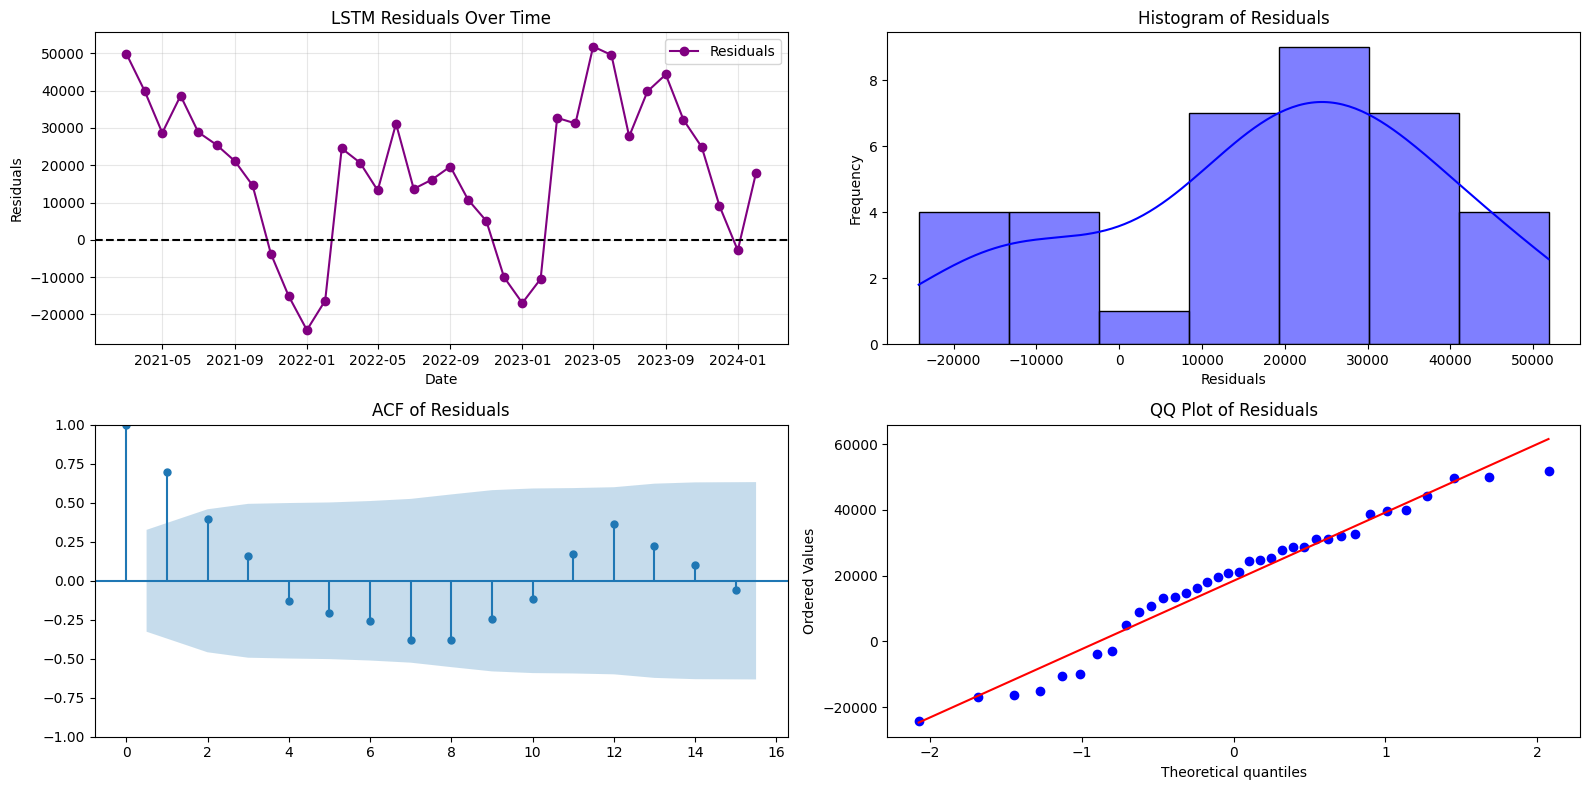


Ljung-Box Test for Residuals:
      lb_stat     lb_pvalue
10  49.602122  3.158501e-07
Residuals may not be white noise (consider model improvements)


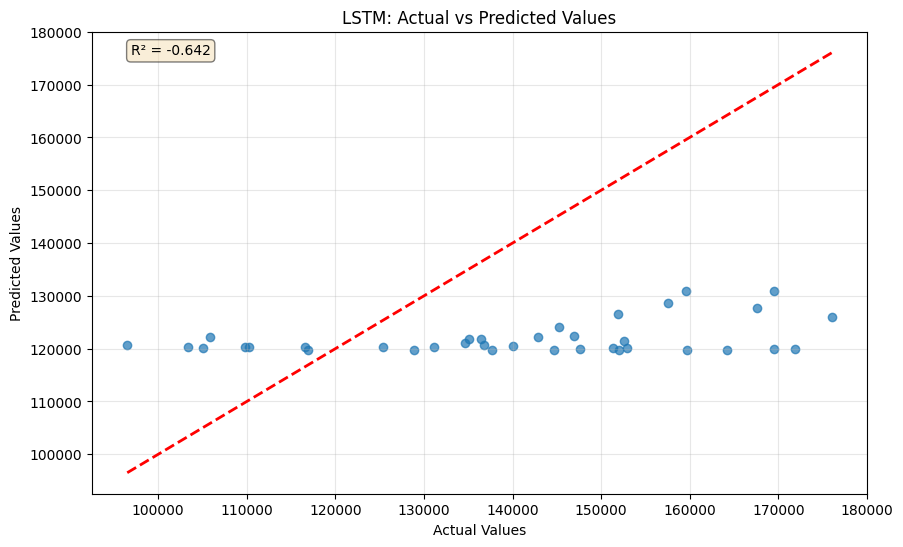

R² Score: -0.642

Model Architecture Summary:
Lookback window: 12 months
LSTM units: 50
Total parameters: 52,101
Training epochs completed: 32

Forecast Summary:
Last actual value: 137686.00
Last forecasted value: 119691.01
Forecast trend: Decreasing
Average monthly change in forecast: -181.80


In [33]:
# Evaluate the forecast
test_set_values = test_set['VALUE'].values
mae = mean_absolute_error(test_set_values, predictions_rescaled)
rmse = np.sqrt(mean_squared_error(test_set_values, predictions_rescaled))
mape = np.mean(np.abs((test_set_values - predictions_rescaled) / test_set_values)) * 100

print(f"\nLSTM Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Residual Analysis
residuals = test_set_values - predictions_rescaled

plt.figure(figsize=(16, 8))

# Residuals over time
plt.subplot(2, 2, 1)
plt.plot(forecast_df.index, residuals, label='Residuals', color='purple', marker='o')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('LSTM Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True, alpha=0.3)

# Histogram of residuals
plt.subplot(2, 2, 2)
sns.histplot(residuals, kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# ACF plot of residuals
from statsmodels.graphics.tsaplots import plot_acf
plt.subplot(2, 2, 3)
plot_acf(residuals, lags=min(15, len(residuals)-1), ax=plt.gca())
plt.title('ACF of Residuals')

# QQ plot of residuals
import scipy.stats as stats
plt.subplot(2, 2, 4)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')

plt.tight_layout()
plt.show()

# Check if residuals are white noise
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(residuals, lags=[min(10, len(residuals)-1)], return_df=True)
print("\nLjung-Box Test for Residuals:")
print(ljung_box_test)

if ljung_box_test['lb_pvalue'].iloc[0] > 0.05:
    print("Residuals appear to be white noise (good!)")
else:
    print("Residuals may not be white noise (consider model improvements)")

# Additional analysis: prediction vs actual scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(test_set_values, predictions_rescaled, alpha=0.7)
plt.plot([test_set_values.min(), test_set_values.max()], 
         [test_set_values.min(), test_set_values.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('LSTM: Actual vs Predicted Values')
plt.grid(True, alpha=0.3)

# Calculate R²
from sklearn.metrics import r2_score
r2 = r2_score(test_set_values, predictions_rescaled)
plt.text(0.05, 0.95, f'R² = {r2:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.show()

print(f"R² Score: {r2:.3f}")

# Feature importance analysis (show what the model learned)
print(f"\nModel Architecture Summary:")
print(f"Lookback window: {LOOKBACK_WINDOW} months")
print(f"LSTM units: {LSTM_UNITS}")
print(f"Total parameters: {model.count_params():,}")
print(f"Training epochs completed: {len(history.history['loss'])}")

# Forecast summary
print(f"\nForecast Summary:")
print(f"Last actual value: {test_set_values[-1]:.2f}")
print(f"Last forecasted value: {predictions_rescaled[-1]:.2f}")
print(f"Forecast trend: {'Increasing' if predictions_rescaled[-1] > predictions_rescaled[0] else 'Decreasing'}")
print(f"Average monthly change in forecast: {np.mean(np.diff(predictions_rescaled)):.2f}")
